In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset= pd.read_csv('Market_Basket_Optimisation.csv', header=None)

In [ ]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Convert dataset to list of transactions
transactions = []
for i in range(0, dataset.shape[0]):
    # Drop NaN values and convert to string
    transactions.append([str(item) for item in dataset.iloc[i].dropna()])


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)


In [ ]:
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
frequent_itemsets = apriori(df, min_support=0.005, use_colnames=True)

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

Top 10 Association Rules sorted by lift:

                         antecedents                     consequents  \
377                          (pasta)                      (escalope)   
376                       (escalope)                         (pasta)   
770                          (pasta)                        (shrimp)   
771                         (shrimp)                         (pasta)   
754              (whole wheat pasta)                     (olive oil)   
755                      (olive oil)             (whole wheat pasta)   
1627                   (ground beef)      (spaghetti, herb & pepper)   
1622      (spaghetti, herb & pepper)                   (ground beef)   
1621                   (ground beef)  (mineral water, herb & pepper)   
1616  (mineral water, herb & pepper)                   (ground beef)   

      antecedent support  consequent support   support  confidence      lift  \
377             0.015731            0.079323  0.005866    0.372881  4.700812   
376  

<Figure size 1000x500 with 0 Axes>

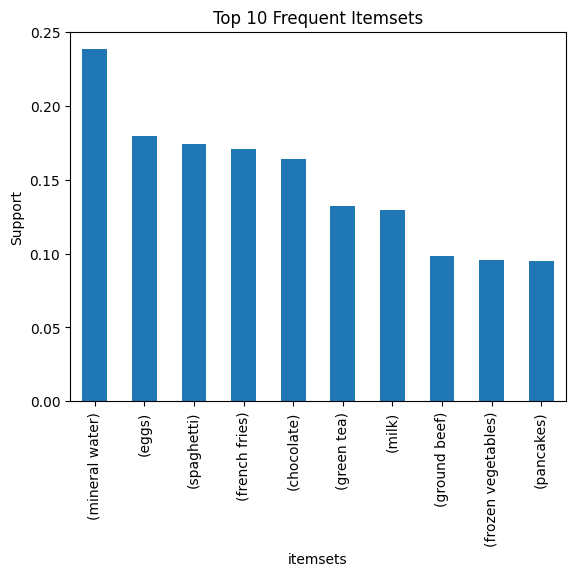

In [ ]:
print("Top 10 Association Rules sorted by lift:\n")
print(rules.sort_values('lift', ascending=False).head(10))

# Bar plot for top 10 frequent itemsets
plt.figure(figsize=(10,5))
frequent_itemsets.sort_values(by='support', ascending=False).head(10).plot(
    x='itemsets', y='support', kind='bar', legend=False)
plt.title('Top 10 Frequent Itemsets')
plt.ylabel('Support')
plt.show()

# Hyperparameter

In [ ]:
for conf in [0.2, 0.4, 0.6, 0.8]:
    print(f"\n=== Rules with min_confidence = {conf} ===")
    rules_conf = association_rules(frequent_itemsets, metric="confidence", min_threshold=conf)
    print(rules_conf[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))



=== Rules with min_confidence = 0.2 ===
  antecedents  consequents   support  confidence      lift
0   (almonds)    (burgers)  0.005199    0.254902  2.923577
1   (almonds)  (chocolate)  0.005999    0.294118  1.795099
2   (almonds)       (eggs)  0.006532    0.320261  1.782108
3   (almonds)  (green tea)  0.005066    0.248366  1.879913
4   (almonds)       (milk)  0.005199    0.254902  1.967098

=== Rules with min_confidence = 0.4 ===
              antecedents      consequents   support  confidence      lift
0  (extra dark chocolate)  (mineral water)  0.005733    0.477778  2.004369
1           (ground beef)  (mineral water)  0.040928    0.416554  1.747522
2           (light cream)  (mineral water)  0.007332    0.470085  1.972098
3           (nonfat milk)  (mineral water)  0.005066    0.487179  2.043811
4             (olive oil)  (mineral water)  0.027596    0.419028  1.757904

=== Rules with min_confidence = 0.6 ===
                 antecedents      consequents   support  confidence      